In [1]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np
import pandas as pd
import json
import re
import ast
import seaborn as sns
import matplotlib.dates as mdates
import itertools
import networkx as nx

from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta


def datespan(startDate, endDate, delta=timedelta(days=1)):
    currentDate = startDate
    while currentDate < endDate:
        yield currentDate
        currentDate += delta

In [2]:
meses = []

for day in datespan(date(2004, 10, 1), date(2020, 1, 1),delta=relativedelta(months=1)):
     meses.append(day.strftime('%Y-%m'))

In [4]:
DG = nx.read_graphml("GRAPHS/" + meses[0] + "_graph.graphml")

NodeView(('AlgDesign', 'AnalyzeFMRI', 'tcltk', 'Bhat', 'BsMD', 'R', 'CDNmoney', 'tframe', 'CircStats', 'MASS', 'boot', 'DAAG', 'leaps', 'oz', 'DBI', 'methods', 'DCluster', 'spdep', 'Davies', 'GenKern', 'KernSmooth', 'HI', 'Hmisc', 'acepack', 'grid', 'lattice', 'HyperbolicDist', 'ISwR', 'survival', 'KMsurv', 'MCMCpack', 'coda', 'MNP', 'MPV', 'Matching', 'Matrix', 'graphics', 'stats', 'NADA', 'NISTnls', 'Oarray', 'PHYLOGR', 'mva', 'PTAk', 'tensor', 'R2HTML', 'R2WinBUGS', 'RArcInfo', 'RColorBrewer', 'RCurl', 'RMySQL', 'RNetCDF', 'RODBC', 'ROracle', 'RQuantLib', 'RSQLite', 'RSvgDevice', 'RUnit', 'RadioSonde', 'RandomFields', 'Rcmdr', 'Rmpi', 'Rwave', 'SASmixed', 'nlme', 'SIN', 'SenSrivastava', 'SparseM', 'StatDataML', 'XML', 'SuppDists', 'UNF', 'UsingR', 'VLMC', 'Zelig', 'abind', 'ade4', 'akima', 'amap', 'ape', 'ash', 'assist', 'asypow', 'aws', 'bayesmix', 'betareg', 'bindata', 'e1071', 'mvtnorm', 'boa', 'bootstrap', 'bqtl', 'car', 'cat', 'catspec', 'cclust', 'cfa', 'chron', 'circular', 'c

In [23]:
complexity = []

for mes in meses:
    DG = nx.read_graphml("GRAPHS/" + mes + "_graph.graphml")
    n = len(list(DG.nodes()))
    e = len(list(DG.edges()))
    p = nx.number_connected_components(DG.to_undirected())
    complexity.append(e-n+p)

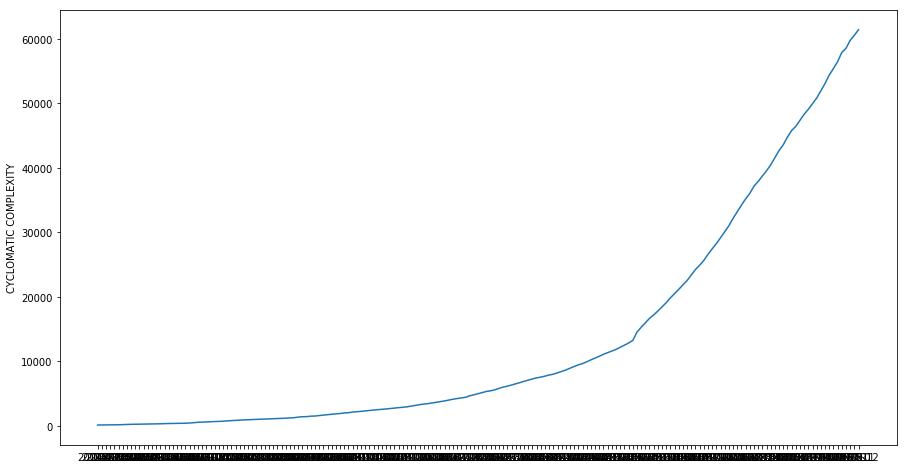

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(meses, complexity)
plt.ylabel('CYCLOMATIC COMPLEXITY')
plt.show()

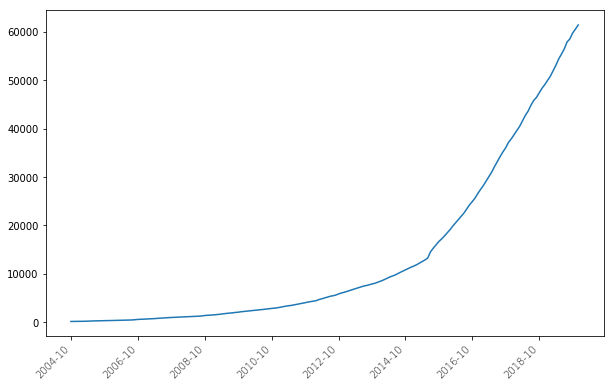

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 6))

chart = sns.lineplot(x=meses,y=complexity)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=24))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
)
plt.show()

In [26]:
meses = []

for day in datespan(date(2004, 10, 1), date(2020, 1, 1),delta=relativedelta(months=1)):
     meses.append(day.strftime('%Y-%m'))

c = (
    Line()
    .add_xaxis(list(map(str,meses)))
    .add_yaxis("CYCLOMATIC COMPLEXITY", complexity, label_opts=opts.LabelOpts(is_show=False))
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="CYCLOMATIC COMPLEXITY",
            position="left",
            name_location="center",
            name_rotate=90,
            name_gap=50
        ),
        xaxis=opts.AxisOpts(
            name="YEAR/MONTH",
            position="bottom",
            name_location="center",
            name_gap=20
        )
    )
)
c.render_notebook()

In [7]:
dependencies = []

for mes in meses:
    DG = nx.read_graphml("GRAPHS/" + mes + "_graph.graphml")
    e = len(list(DG.edges()))
    dependencies.append(e)

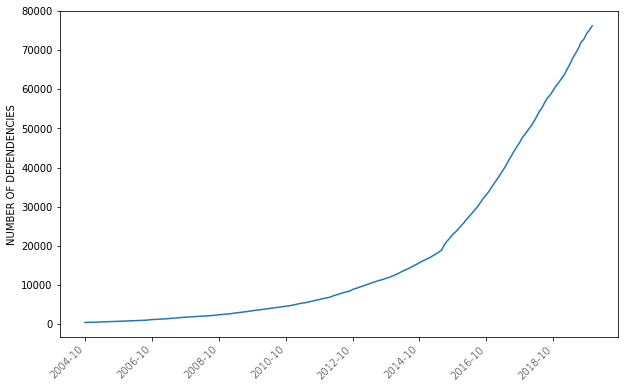

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 6))

chart = sns.lineplot(x=meses,y=dependencies)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=24))
plt.ylabel('NUMBER OF DEPENDENCIES')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
)
plt.show()

In [9]:
from collections import OrderedDict
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Bar, Line, Scatter

meses = []

for day in datespan(date(2004, 10, 1), date(2020, 1, 1),delta=relativedelta(months=1)):
     meses.append(day.strftime('%Y-%m'))

c = (
    Line()
    .add_xaxis(list(map(str,meses)))
    .add_yaxis("NUMBER OF DEPENDENCIES", dependencies, label_opts=opts.LabelOpts(is_show=False))
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="NUMBER OF DEPENDENCIES",
            position="left",
            name_location="center",
            name_rotate=90,
            name_gap=50
        ),
        xaxis=opts.AxisOpts(
            name="YEAR/MONTH",
            position="bottom",
            name_location="center",
            name_gap=20
        )
    )
)
c.render_notebook()

In [31]:
x2 = list(range(0, len(b)))
linregress(x2[-48:],b[-48:])

LinregressResult(slope=1106.9491424229266, intercept=-126020.16824070053, rvalue=0.9992346263699318, pvalue=2.07719218393305e-66, stderr=6.389250376321431)

In [32]:
x2 = np.array(x2)
poly_regression(x2[-60:],dependencies[-60:])

TypeError: list indices must be integers or slices, not tuple

In [11]:
from collections import OrderedDict
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Bar, Line, Scatter

meses = []

for day in datespan(date(2004, 10, 1), date(2020, 1, 1),delta=relativedelta(months=1)):
     meses.append(day.strftime('%Y-%m'))
        
a = np.array(dependencies)
b = np.diff(a) / a[1:]

c = (
    Line()
    .add_xaxis(list(map(str,meses)))
    .add_yaxis("GROWTH RATE (DEPENDENCIES)", b, label_opts=opts.LabelOpts(is_show=False))
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="GROWTH RATE",
            position="left",
            name_location="center",
            name_rotate=90,
            name_gap=50
        ),
        xaxis=opts.AxisOpts(
            name="YEAR/MONTH",
            position="bottom",
            name_location="center",
            name_gap=20
        )
    )
)

c.render_notebook()

In [1]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

def poly_regression(x,y):
    # transforming the data to include another axis
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]

    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print(rmse)
    print(r2)

    plt.scatter(x, y, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.show()

In [12]:
from scipy.stats import linregress
x = list(range(0, len(dependencies)))
y = np.array(dependencies)
linregress(x[-60:],y[-60:])

LinregressResult(slope=1042.3390664073354, intercept=-115396.62429378531, rvalue=0.9972942239776657, pvalue=1.8568395685727552e-67, stderr=10.088780184615898)

In [15]:
0.997**2

0.994009

463.1534476251816
0.9993452465750963


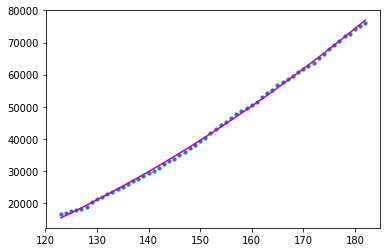

In [22]:
x = np.array(x)
poly_regression(x[-60:],y[-60:])

In [20]:
x2 = list(range(0, len(b)))
linregress(x2[-48:],b[-48:])

LinregressResult(slope=-0.0003795166656489589, intercept=0.08326277260181139, rvalue=-0.8521650341539134, pvalue=1.5697658020949177e-14, stderr=3.436027640612197e-05)

0.00675412480358606
0.4224229880862298


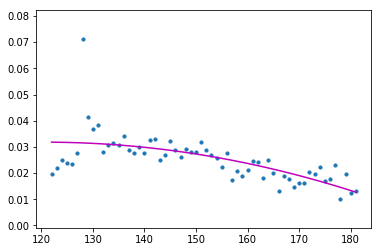

In [18]:
x2 = np.array(x2)
poly_regression(x2[-60:],b[-60:])

In [21]:
0.85**2

0.7224999999999999

In [36]:
x2 = list(range(0, len(complexity)))
linregress(x2[-60:],complexity[-60:])


LinregressResult(slope=873.2828285634896, intercept=-99321.64802259882, rvalue=0.9966874882106824, pvalue=6.505869645343771e-65, stderr=9.35654869209518)

In [38]:
0.996**2

0.992016

380.89885025182093
0.9993698747331003


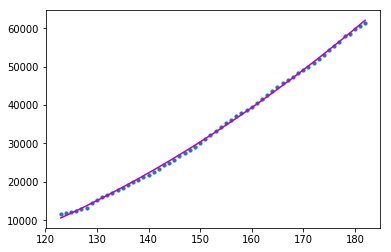

In [37]:
x2 = np.array(x2)
complexity = np.array(complexity)
poly_regression(x2[-60:],complexity[-60:])